# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [173]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

import panel as pn
from panel.interact import interact

In [174]:
# Read the Mapbox API key
load_dotenv('test1.env')
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [175]:
# Import the necessary CSVs to Pandas DataFrames
# YOUR CODE HERE!
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

coord_path = Path("Data/neighborhoods_coordinates.csv")
coord_data = pd.read_csv(coord_path)
coord_data.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [176]:
# Define Panel Visualization Functions
def housing_units_per_year():    
    """Housing Units Per Year."""
    
    # YOUR CODE HERE!
    #set up data
    sfo_house_units = pd.DataFrame(sfo_data.groupby('year')['housing_units'].mean())
    tot_housing = sfo_data.groupby(['year'])['housing_units'].mean()
    #plot
#     fig, ax = plot()
#     ax = sfo_house_units.plot.bar(title = "Housing Units in San Francisco from 2010 to 2016",  ylim = (tot_housing.min() - tot_housing.std(), tot_housing.max() + tot_housing.std()))
#     return (fig1)
    fig, ax = plt.subplots()
    ax.bar( sfo_house_units.index, sfo_house_units['housing_units'] )
    ax.set_ylim(tot_housing.min() - tot_housing.std(),  tot_housing.max() + tot_housing.std())
    ax.set_title ("Housing Units in San Francisco from 2010 to 2016")
    ax.set_xlabel("Year")
    ax.set_ylabel("Houseing Units")
    return (fig)



def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    # YOUR CODE HERE!
    # awr up data
    sfo_house_units = pd.DataFrame(sfo_data.groupby('year')['housing_units'].mean())
    sfo_house_units['sale_price_sqr_foot'] = sfo_data.groupby('year')['sale_price_sqr_foot'].mean()
    sfo_house_units ['gross_rent'] = sfo_data.groupby('year')['gross_rent'].mean()
    #plot
    fig2, ax2 = plt.subplots()
    ax2.plot(sfo_house_units.index, sfo_house_units['gross_rent'],color='tab:orange' )
    ax2.set_ylabel('Price per SqFt', fontweight="bold", fontsize = 12)
    ax2.set_xlabel('Year',  fontweight="bold", fontsize = 12)
    ax2.set_title('Average Gross Rent by Year',fontweight="bold", fontsize = 12 )
    return (fig2)


def average_sales_price():
    """Average Sales Price Per Year."""
    
    # YOUR CODE HERE!
    #set up data
    sfo_house_units = pd.DataFrame(sfo_data.groupby('year')['housing_units'].mean())
    sfo_house_units['sale_price_sqr_foot'] = sfo_data.groupby('year')['sale_price_sqr_foot'].mean()
    sfo_house_units ['gross_rent'] = sfo_data.groupby('year')['gross_rent'].mean()
    #plot
    fig1, ax1 = plt.subplots()
    ax1.plot(sfo_house_units.index, sfo_house_units['sale_price_sqr_foot'], color='tab:blue')
    ax1.set_ylabel('Price per SqFt', fontweight="bold", fontsize = 12)
    ax1.set_xlabel('Year',  fontweight="bold", fontsize = 12)
    ax1.set_title('Average Price per SqFt by Year',fontweight="bold", fontsize = 12 )
    return (fig1)


def average_price_by_neighborhood(Neighborhood):
    """Average Prices by Neighborhood."""
    
    # YOUR CODE HERE!
    # set up data
    sfo_neighb = pd.DataFrame(columns = ['sale_price_sqr_foot', 'housing_units', 'gross_rent'])
    sfo_neighb['sale_price_sqr_foot'] = sfo_data.groupby(['year','neighborhood' ])['sale_price_sqr_foot'].mean()
    sfo_neighb ['gross_rent'] = sfo_data.groupby(['year','neighborhood' ])['gross_rent'].mean()
    sfo_neighb ['housing_units'] = sfo_data.groupby(['year','neighborhood' ])['housing_units'].mean()
    sfo_neighb.reset_index(inplace = True)
    
    #set up plotting datafraem
    disp_df = pd.DataFrame()
    disp_df['years'] = sfo_neighb.loc[sfo_neighb['neighborhood'] == Neighborhood, 'year']
    disp_df['sale_price_sqr_foot'] = sfo_neighb.loc[sfo_neighb['neighborhood'] == Neighborhood, 'sale_price_sqr_foot']
    
    #return plot
    return disp_df.hvplot.line(
        x = 'years',
        y = 'sale_price_sqr_foot',
        title = (f'Neighborhood:  {Neighborhood}'),

    )
    
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    # YOUR CODE HERE!
    # set up data in two steps from rental analysis. may be combined into one.

    sfo_neighb = pd.DataFrame(columns = ['sale_price_sqr_foot', 'housing_units', 'gross_rent'])

    sfo_neighb['sale_price_sqr_foot'] = sfo_data.groupby(['year','neighborhood' ])['sale_price_sqr_foot'].mean()
    sfo_neighb ['gross_rent'] = sfo_data.groupby(['year','neighborhood' ])['gross_rent'].mean()
    sfo_neighb ['housing_units'] = sfo_data.groupby(['year','neighborhood' ])['housing_units'].mean()
    sfo_avg_df = pd.DataFrame()
    sfo_avg_df ['sale_price_sqr_foot'] = sfo_neighb.groupby('neighborhood')['sale_price_sqr_foot'].mean()
    sfo_avg_df ['housing_units'] = sfo_neighb.groupby('neighborhood')['housing_units'].mean()
    sfo_avg_df ['gross_rent'] = sfo_neighb.groupby('neighborhood')['gross_rent'].mean()
    sf_topten_df = sfo_avg_df.nlargest(10,'gross_rent' )
    sf_topten_df.sort_values(by = 'sale_price_sqr_foot', inplace = True)
    sf_topten_df.reset_index(inplace = True)

    #plot

    return sf_topten_df.hvplot.bar(
        x = 'neighborhood',
        y = 'sale_price_sqr_foot',
        title = ('Top 10 Most Expensive Neighborhoods - selection not working in tab'),
        rot = 90
    )
      

def most_expensive_neighborhoods_rent_sales(Neighbourhood):
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    # YOUR CODE HERE!
    # set up data in two steps from rental analysis. may be combined into one.

    sfo_neighb = pd.DataFrame(columns = ['sale_price_sqr_foot', 'housing_units', 'gross_rent'])

    sfo_neighb['sale_price_sqr_foot'] = sfo_data.groupby(['year','neighborhood' ])['sale_price_sqr_foot'].mean()
    sfo_neighb ['gross_rent'] = sfo_data.groupby(['year','neighborhood' ])['gross_rent'].mean()
    sfo_neighb ['housing_units'] = sfo_data.groupby(['year','neighborhood' ])['housing_units'].mean()    
    
    #prepare summary data
    test_df = pd.DataFrame()
    test_df['gross_rent'] = sfo_neighb.groupby(['year', 'neighborhood'])['gross_rent'].mean()
    test_df['sale_price_sqr_foot']= sfo_neighb.groupby(['year', 'neighborhood'])['sale_price_sqr_foot'].mean()
    test_df.reset_index(inplace=True)

    #prepare data for display
    disp_df = pd.DataFrame()
    disp_df['years'] = test_df.loc[test_df['neighborhood'] == Neighbourhood, 'year']
    disp_df['gross_rent'] = test_df.loc[test_df['neighborhood'] == Neighbourhood, 'gross_rent']
    disp_df['sale_price_sqr_foot'] = test_df.loc[test_df['neighborhood'] == Neighbourhood, 'sale_price_sqr_foot']


    return(disp_df.hvplot.bar(
        x = 'years',
        y = ['gross_rent', 'sale_price_sqr_foot' ],
        value_label = "Price",
        rot = 90,
        title = (f'Top 10 Expensive Neighborhoods: {Neighbourhood}'))
    )
  
    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    # YOUR CODE HERE!
#     #set up data
    sfo_neighb = pd.DataFrame(columns = ['sale_price_sqr_foot', 'housing_units', 'gross_rent'])

    sfo_neighb['sale_price_sqr_foot'] = sfo_data.groupby(['year','neighborhood' ])['sale_price_sqr_foot'].mean()
    sfo_neighb ['gross_rent'] = sfo_data.groupby(['year','neighborhood' ])['gross_rent'].mean()
    sfo_neighb ['housing_units'] = sfo_data.groupby(['year','neighborhood' ])['housing_units'].mean()   

    sfo_avg_df = pd.DataFrame()
    sfo_avg_df ['sale_price_sqr_foot'] = sfo_neighb.groupby('neighborhood')['sale_price_sqr_foot'].mean()
    sfo_avg_df ['housing_units'] = sfo_neighb.groupby('neighborhood')['housing_units'].mean()
    sfo_avg_df ['gross_rent'] = sfo_neighb.groupby('neighborhood')['gross_rent'].mean()
    
    sf_topten_df = sfo_avg_df.nlargest(10,'gross_rent' )
    sf_topten_df.sort_values(by = 'sale_price_sqr_foot', inplace = True)
    sf_topten_df.reset_index(inplace = True)    
    
#     # set up data make a copy of the data so no side effects with global variables
    df_expensive_neighborhoods = sf_topten_df.copy()
    df_expensive_neighborhoods.reset_index(inplace = True)
    
# #     #set up data

    sfo_avg_df_reset = sfo_avg_df.copy()
    sfo_avg_df_reset.reset_index(inplace = True)
    df_expensive_neighborhoods_per_year = sfo_avg_df_reset[sfo_avg_df_reset["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
    
    # set up plot
    return px.parallel_categories(
                df_expensive_neighborhoods_per_year,
                dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", 'gross_rent'],
                color="sale_price_sqr_foot",
                color_continuous_scale=px.colors.sequential.Inferno,
                labels={
                    "sale_price_sqr_foot": "sale_price_sqr_foot",
                    "housing_units": "housinhousing_unitsg_units",
                    "gross_rent": "gross_rent",
                    "neighborhood": "neighborhood"
                },
    )


def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!
    # set up data make a copy of the data so no side effects with global variables
    sfo_neighb = pd.DataFrame(columns = ['sale_price_sqr_foot', 'housing_units', 'gross_rent'])

    sfo_neighb['sale_price_sqr_foot'] = sfo_data.groupby(['year','neighborhood' ])['sale_price_sqr_foot'].mean()
    sfo_neighb ['gross_rent'] = sfo_data.groupby(['year','neighborhood' ])['gross_rent'].mean()
    sfo_neighb ['housing_units'] = sfo_data.groupby(['year','neighborhood' ])['housing_units'].mean()   
    
    sfo_avg_df = pd.DataFrame()
    sfo_avg_df ['sale_price_sqr_foot'] = sfo_neighb.groupby('neighborhood')['sale_price_sqr_foot'].mean()
    sfo_avg_df ['housing_units'] = sfo_neighb.groupby('neighborhood')['housing_units'].mean()
    sfo_avg_df ['gross_rent'] = sfo_neighb.groupby('neighborhood')['gross_rent'].mean()    
    
    sf_topten_df = sfo_avg_df.nlargest(10,'gross_rent' )
    sf_topten_df.sort_values(by = 'sale_price_sqr_foot', inplace = True)
    sf_topten_df.reset_index(inplace = True)    
    
    df_expensive_neighborhoods = sf_topten_df.copy()
    df_expensive_neighborhoods.reset_index(inplace = True)      
    
    # set up data
    sfo_avg_df_reset = sfo_avg_df.copy()
    sfo_avg_df_reset.reset_index(inplace = True)
    df_expensive_neighborhoods_per_year = sfo_avg_df_reset[sfo_avg_df_reset["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]

    #plot it
    return px.parallel_categories(
        df_expensive_neighborhoods_per_year,
        dimensions=[ "sale_price_sqr_foot", "housing_units", 'gross_rent'],
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno,
        labels={
            "sale_price_sqr_foot": "sale_price_sqr_foot",
            "housing_units": "housinhousing_unitsg_units",
            "gross_rent": "gross_rent",
            },
        )


def neighborhood_map():
    """Neighborhood Map."""

    # YOUR CODE HERE!
    # set up data in two steps from rental analysis. may be combined into one.

    sfo_neighb = pd.DataFrame(columns = ['sale_price_sqr_foot', 'housing_units', 'gross_rent'])

    sfo_neighb['sale_price_sqr_foot'] = sfo_data.groupby(['year','neighborhood' ])['sale_price_sqr_foot'].mean()
    sfo_neighb ['gross_rent'] = sfo_data.groupby(['year','neighborhood' ])['gross_rent'].mean()
    sfo_neighb ['housing_units'] = sfo_data.groupby(['year','neighborhood' ])['housing_units'].mean()    
    
    # create data frame again
    sfo_avg_df = pd.DataFrame()
    sfo_avg_df ['sale_price_sqr_foot'] = sfo_neighb.groupby('neighborhood')['sale_price_sqr_foot'].mean()
    sfo_avg_df ['housing_units'] = sfo_neighb.groupby('neighborhood')['housing_units'].mean()
    sfo_avg_df ['gross_rent'] = sfo_neighb.groupby('neighborhood')['gross_rent'].mean()
   
    #join coordinates with neighborhood
    sf_joint_df = coord_data.join(sfo_avg_df, on = 'Neighborhood',   how = 'inner')
    
    return px.scatter_mapbox(
        sf_joint_df,
        lat="Lat",
        lon="Lon",
        size="sale_price_sqr_foot",
        color="gross_rent",
        title = "Average Sale Price Per Square Foot and Gross Rent in San Francisco - Controls not working in Tab",
        zoom=4)
    # Display the 
#     map.show()

def sunburst():
    """Sunburst Plot."""
    
    # YOUR CODE HERE!
    # set up data make a copy of the data so no side effects with global variables
    sfo_neighb = pd.DataFrame(columns = ['sale_price_sqr_foot', 'housing_units', 'gross_rent'])

    sfo_neighb['sale_price_sqr_foot'] = sfo_data.groupby(['year','neighborhood' ])['sale_price_sqr_foot'].mean()
    sfo_neighb ['gross_rent'] = sfo_data.groupby(['year','neighborhood' ])['gross_rent'].mean()
    sfo_neighb ['housing_units'] = sfo_data.groupby(['year','neighborhood' ])['housing_units'].mean()   
    
    sfo_avg_df = pd.DataFrame()
    sfo_avg_df ['sale_price_sqr_foot'] = sfo_neighb.groupby('neighborhood')['sale_price_sqr_foot'].mean()
    sfo_avg_df ['housing_units'] = sfo_neighb.groupby('neighborhood')['housing_units'].mean()
    sfo_avg_df ['gross_rent'] = sfo_neighb.groupby('neighborhood')['gross_rent'].mean()
    
    sf_topten_df = sfo_avg_df.nlargest(10,'gross_rent' )
    sf_topten_df.sort_values(by = 'sale_price_sqr_foot', inplace = True)
    sf_topten_df.reset_index(inplace = True)    
    
    df_expensive_neighborhoods = sf_topten_df.copy()
    df_expensive_neighborhoods.reset_index(inplace = True)       
    
    #set up data
    starburst_data = sfo_data[sfo_data["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
    starburst_data.reset_index(inplace=True)
    starburst_data.head()
    
    #plot starburst
    return px.sunburst(starburst_data,
           path = ['year','neighborhood' ],
            color = 'gross_rent',
            color_continuous_scale = "blues", 
            title = "Cost Analysis of Most Expensive Neighborhoods in San Francisco per year",
            width=750, height=750
           )

In [177]:
# make a list of neighborhoods
neighborhoods = sfo_data['neighborhood'].unique()

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!
#### Why do charts show up

In [178]:
# delete
# Create a Title for the Dashboard
# YOUR CODE HERE!


# Create a tab layout for the dashboard
# YOUR CODE HERE!


# Create the dashboard
# YOUR CODE HERE!

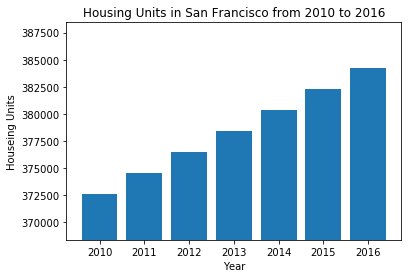

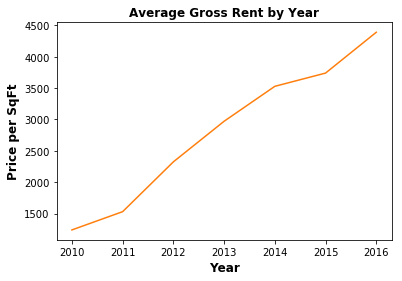

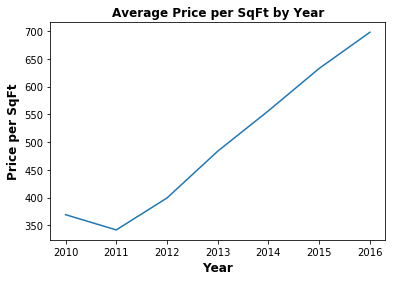

In [179]:
# Create a Title for the Dashboard
# YOUR CODE HERE!
geo_column = pn.Column(
    "## Welcome  Tab Neighborhood Map", neighborhood_map(),
)

# Create a tab layout for the dashboard
# YOUR CODE HERE!
year_col = pn.Row(
    "## SFO Market Anaysis",
    housing_units_per_year(),
    average_gross_rent(),
    average_sales_price(),
#     interact(average_price_by_neighborhood, Neighborhood=neighborhoods ),
)

# Create a tab layout for the dashboard
# YOUR CODE HERE!
neigh_col = pn.Column(
    "## SFO Neighborhood Analysis",
    top_most_expensive_neighborhoods(),
    interact(most_expensive_neighborhoods_rent_sales, Neighbourhood=neighborhoods ),
)

# # Create a tab layout for the dashboard
# #YOUR CODE HERE!
parall_col = pn.Column(
    "## Parallel Analysis",
    parallel_coordinates(),
    parallel_categories(),
)

# # Create a tab layout for the dashboard
# #YOUR CODE HERE!
starb_col = pn.Column(
    "## Starbust Analsys",
    sunburst(),
)


# Create the dashboard
# YOUR CODE HERE!
sfo_dashbord = pn.Tabs(
    ("Welcome", geo_column), ("Yearly Market Analysis", year_col), ('Neighborhood Analysis', neigh_col), ('Parallel Plot Analysis', parall_col), ("Sunburst", starb_col) 
#     ("Welcome", geo_column), ("Yearly Market Analysis", year_col), ('Neighborhood Analysis', neigh_col),
#      ('Parallel Plot Analysis', parall_col), ("Sunburst", starb_col) 
)

## Serve the Panel Dashboard
### Hassan's Note: 
#### Dashboard shows interactive behavior with 3 tabs. 
#### Dashboard does not show interactive behavior with 5 tabs that includes parallel plots and Sunburst.

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
    [1] Row
        [0] Markdown(str)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
        [3] Matplotlib(Figure)
    [2] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
        [2] Column
            [0] Column
                [0] Select(name='Neighbourhood', options=['Alamo Square', ...], value='Alamo Square')
            [1] Row
                [0] HoloViews(Bars, name='interactive13861')
    [3] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
        [2] Plotly(Figure)
    [4] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
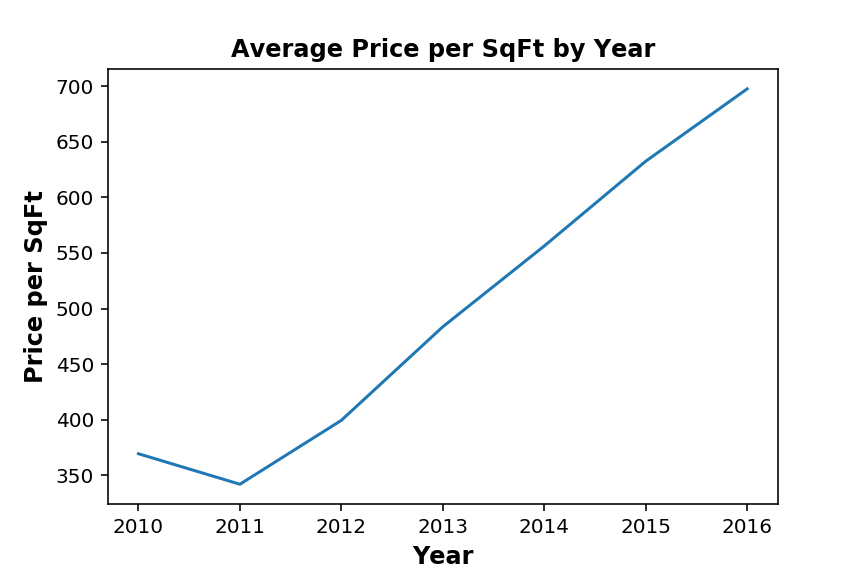
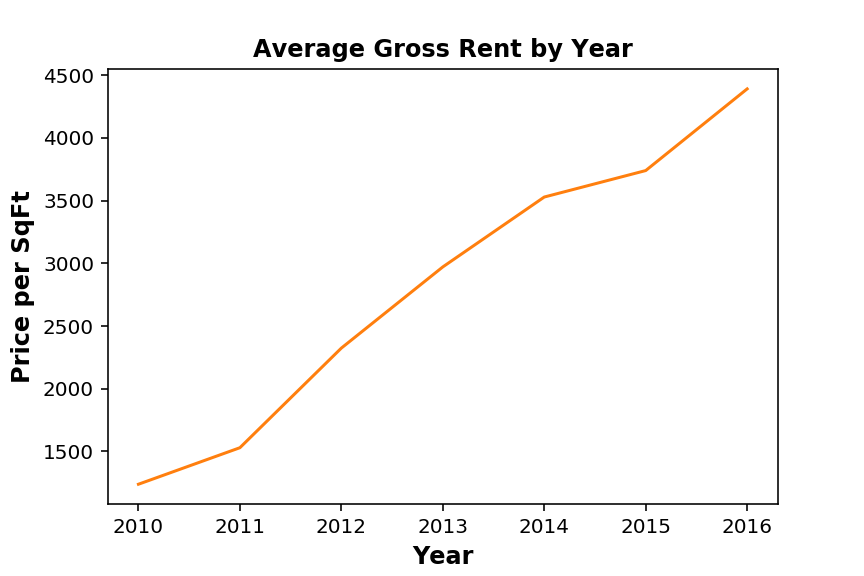
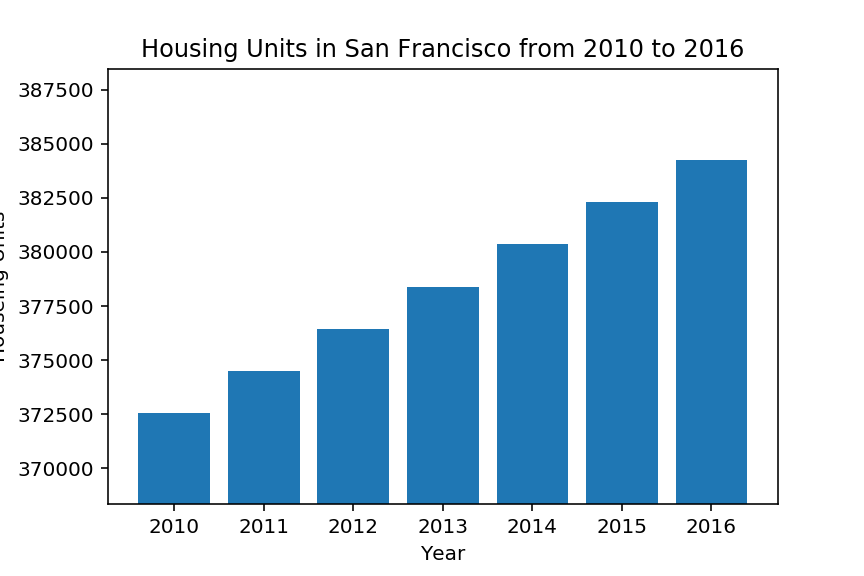

In [180]:
# Serve the# dashboard
# YOUR CODE HERE!
sfo_dashbord.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [181]:
# housing_units_per_year()

In [182]:
# average_gross_rent()

In [183]:

# average_sales_price(average_sales_price, Neighborhood=neighborhoods )

In [184]:

# interact(average_price_by_neighborhood, Neighborhood=neighborhoods )

In [185]:
# top_most_expensive_neighborhoods()

In [186]:

# interact(most_expensive_neighborhoods_rent_sales, Neighbourhood=neighborhoods )

In [187]:
# neighborhood_map().show()


In [188]:
# parallel_categories()

In [189]:
# parallel_coordinates()

In [190]:
# sunburst()